# Data visualization with various cuts explored in our paper.
## Transverse-momentum-dependent Multiplicities of Charged Hadrons for HERMES Airapetian:2012ki and COMPASS Collaborations Adolph:2013stb. 
## New COMPASS data are 
### Penn State Berks, Fall 2018 
#### * Alexey  Prokudin*

In [367]:
from __future__ import division, print_function
from functools import partial, reduce
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fitpack
import interface
import obslib.sidis.reader
import obslib.sidis.stfuncs
from qcdlib.aux import AUX
from tools.config import conf
%matplotlib inline

This function reads data from multiple files and merges the data frames.

In [368]:
def get_data():
    # Merge all of the data tables
    return reduce(partial(pd.DataFrame.merge, how="outer"), map(pd.DataFrame, conf["sidis tabs"].values()))

upol_hermes_no_filters.py defines data files to read, no filters applied yet to the data selection. Here we read all HERMES multiplicities.

In [369]:
input_file = "../inputs_alexei_gk/upol_hermes_no_filters.py"

CUTMIN = 0.99
CUTMAX = 5.28

filterstr = "dy>"
#filterstr = "yh_minus_yp>"

The interface.py allows to get configuration file from the file that we read.

In [370]:
interface.gen_config(input_file)

In [371]:
interface.gen_config(input_file)  # Read file

conf["datasets"]["sidis"]["filters"][0] = filterstr + str(CUTMIN)  # Apply filter with min cut

conf["aux"] = AUX()
conf["sidis tabs"] = obslib.sidis.reader.READER().load_data_sets("sidis")
conf['sidis stfuncs'] = obslib.sidis.stfuncs.STFUNCS()

data = get_data().sort_values("dy")

loading sidis data sets 1007

In [372]:
data["yh_minus_yp"] = data["yh"] - data["yp"] 

In [373]:
print(", ".join(sorted(data.columns)))

Ebeam, F2, Q2, W2, col, dy, hadron, i, obs, pT, stat_u, systabs_u, systole, systrel, target, value, x, y, yh, yh_minus_yp, yp, z


We create QCUT which is qT^2/Q^2

In [374]:
data["QCUT"] = (data["pT"] / data["z"])**2/ (data["Q2"])

In [375]:

def custom_label(label):
    if label =="Q2":
        label="$Q^2$"
    if label =="qT":
        label="$q_T$"
    if label =="pT":
        label="$P_{hT}$"
    if label =="qToverQ":
        label="$q_T/Q$"
    if label =="qToverQ2":
        label="$q_T^2/Q^2$"
    if label =="dy":
        label="$y_p-y_h$"
    if label =="yh_minus_yp":
        label="$y_h-y_p$"
    return label

def color_plot(data,vert_lab, hor_lab, cmap="plasma", alpha=1.0):
    vert = data[vert_lab].values
    hor = data[hor_lab].values

    data_q = data["QCUT"]

    colors = (data_q - min(data_q)) / (max(data_q) - min(data_q))  # XXX
    
    fig, ax = plt.subplots()

    #ax.set_title(custom_label(vert_lab) + " vs. " + custom_label(hor_lab))
    ax.set_ylabel(custom_label(vert_lab))
    ax.set_xlabel(custom_label(hor_lab))

    ax.scatter(hor, vert, c=colors, cmap=plt.get_cmap(cmap), alpha=alpha)
    
    #heatmap = ax.pcolor(data_q, cmap=plt.get_cmap(cmap)) # heatmap 
    #plt.colorbar(heatmap)

    fig.tight_layout()
    
    return fig, ax, vert, hor

In [376]:
data["qT"] = data["pT"] / data["z"]
data["qToverQ"] = data["pT"] / data["z"]/(data["Q2"]**0.5)
data["qToverQ2"] = (data["pT"] / data["z"])**2/(data["Q2"])

qT vs. qToverQ2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qT vs. Q2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 54

qT vs. dy
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qT vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qToverQ2 vs. Q2
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 54

qToverQ2 vs. dy
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

qToverQ2 vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660

Q2 vs. dy
Number of points: 2660
Unique vertical values: 54
Unique horizontal values: 2660

Q2 vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 54
Unique horizontal values: 2660

dy vs. yh_minus_yp
Number of points: 2660
Unique vertical values: 2660
Unique horizontal values: 2660



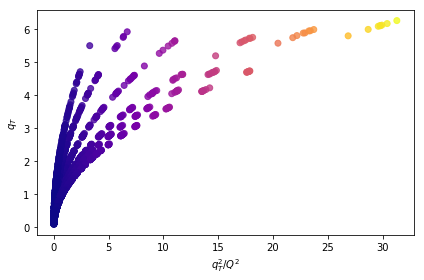

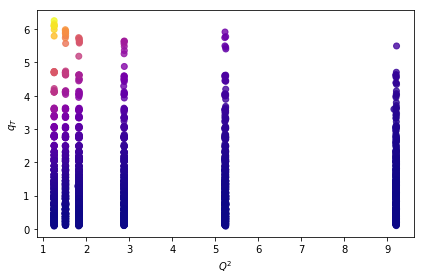

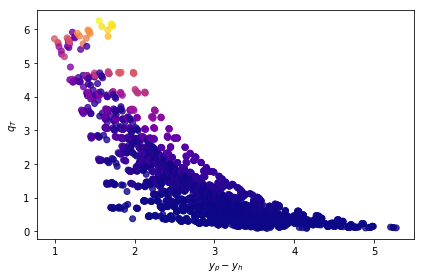

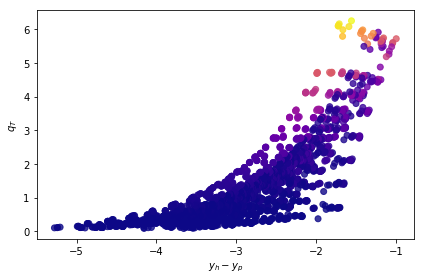

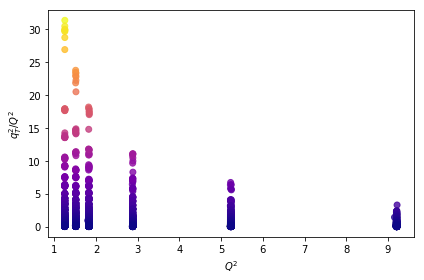

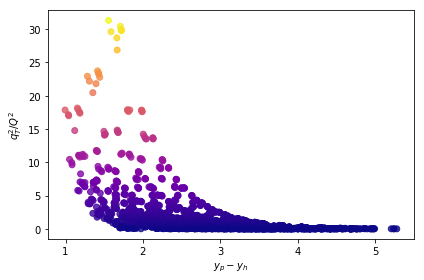

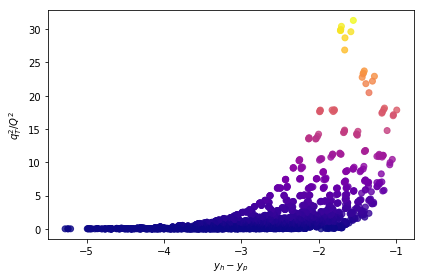

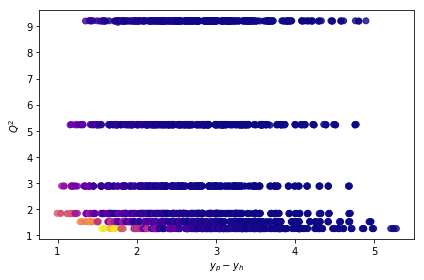

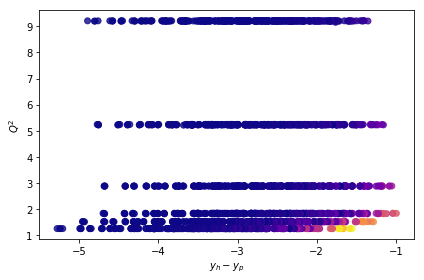

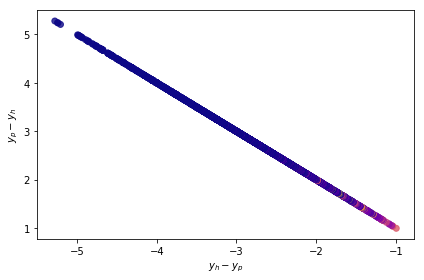

In [377]:
# labels = ("Q2", "pT", "x", "y", "z")
labels = ("qT","qToverQ2","Q2","dy","yh_minus_yp")

for v, h in combinations(labels, 2):
    fig, ax, vert, hor = color_plot(data,v, h, alpha=0.8)

    print(v + " vs. " + h)
    print("Number of points:", len(vert))
    print("Unique vertical values:", len(set(vert)))
    print("Unique horizontal values:", len(set(hor)))
    print()

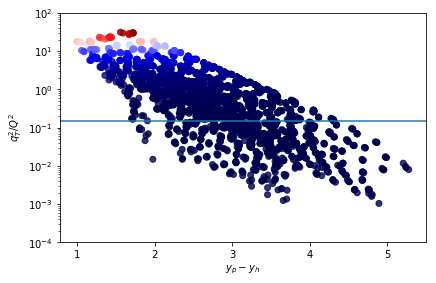

In [378]:
fig, ax, vert, hor = color_plot(data,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.0001,100])
plt.axhline(0.15,0,6)
plt.show()

Here we create filtered data with standard Torino cuts

In [379]:
torino_data = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9")

In [391]:
normal_length = len(torino_data)

len(torino_data.query("(pT/z)**2>=Q2"))

292

In [381]:
len(torino_data)

978

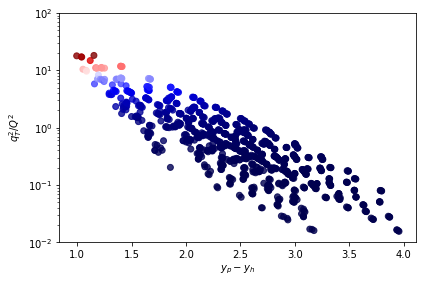

In [382]:
fig, ax, vert, hor = color_plot(torino_data,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,100])
#plt.axhline(0.15,0,6)
plt.savefig("hermes_data_torino.pdf")
plt.show()


Let us see what happens if we add rapidity cut to Torino selection

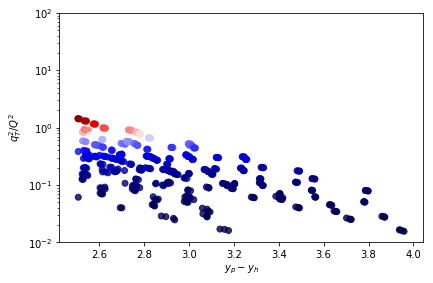

In [394]:
torino_data_rap = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and dy>2.5")
len(torino_data_rap.query("(pT/z)**2>=Q2"))
fig, ax, vert, hor = color_plot(torino_data_rap,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.01,100])
plt.axhline(0.15,0,6)
plt.savefig("hermes_data_torino_rapidity.pdf")
plt.show()

Here we create filtered data with TMD inspired cuts

In [383]:
cut_data_qt = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2")

In [384]:
len(cut_data_qt)

363

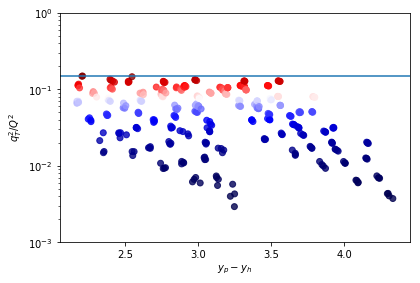

In [385]:
fig, ax, vert, hor = color_plot(cut_data_qt,"qToverQ2", "dy",cmap="seismic", alpha=0.8)
#ax.yscale('symlog')
ax.set_yscale("log")
ax.set_ylim([0.001,1])
plt.axhline(0.15,0,6)
plt.savefig("hermes_data_new.pdf")
plt.show()


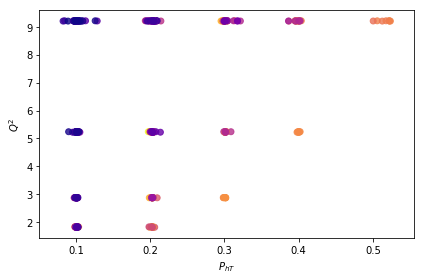

In [386]:
fig, ax, vert, hor = color_plot(cut_data_qt,"Q2", "pT", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.0001,100])
#plt.axhline(0.15,0,6)
plt.savefig("hermes_data_new_pt.pdf")
plt.show()


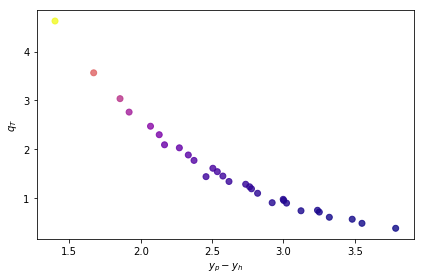

In [387]:
torino_data_x = data.query("z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9 and x<0.1 and target=='proton' and hadron=='pi+'")
fig, ax, vert, hor = color_plot(torino_data_x,"qT", "dy", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.01,100])
#plt.axhline(0.15,0,6)
plt.show()

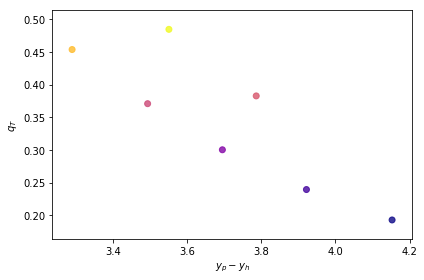

In [388]:
cut_data_qt_x = data.query("z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2<=0.15*Q2 and x<0.1 and target=='proton' and hadron=='pi+'")
fig, ax, vert, hor = color_plot(cut_data_qt_x,"qT", "dy", alpha=0.8)
#ax.yscale('symlog')
#ax.set_yscale("log")
#ax.set_ylim([0.01,100])
#plt.axhline(0.15,0,6)
plt.show()